In [1]:
!wget 'https://www.dropbox.com/s/webw4cr5dsnm3jv/iris1.csv'

--2022-01-12 18:20:45--  https://www.dropbox.com/s/webw4cr5dsnm3jv/iris1.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/webw4cr5dsnm3jv/iris1.csv [following]
--2022-01-12 18:20:45--  https://www.dropbox.com/s/raw/webw4cr5dsnm3jv/iris1.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc237fec84acd3e6be81568ce83b.dl.dropboxusercontent.com/cd/0/inline/BdqdqvuRKalfBRbiMrfdjhlf9JJLphq5BXANvKrij9PZ5QaNSCnRk9dPADFn3uayI_yhkPuU8HhOsZIXAIusrVknJ1KNAqyziHT8p5J39yqWEbZ017hWXtPIRUhIVAbgTusgvMHRdacVswAIbX_HS64A/file# [following]
--2022-01-12 18:20:45--  https://uc237fec84acd3e6be81568ce83b.dl.dropboxusercontent.com/cd/0/inline/BdqdqvuRKalfBRbiMrfdjhlf9JJLphq5BXANvKrij9PZ5QaNSCnRk9dPADFn3uayI_yhkPuU8HhOsZIXAIusrVknJ1KNAqyziHT

In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv('iris1.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,NaN,1.4,0.2,Iris-Setosa


In [4]:
print('the shape of the data is ', df.shape)

the shape of the data is  (150, 5)


In [5]:
print('The null values in each area is ', df.isnull().sum())

The null values in each area is  sepal length (cm)     0
sepal width (cm)     30
petal length (cm)    68
petal width (cm)      0
Class                 0
dtype: int64


In [6]:
for column in list(df.columns):
  if df[column].isnull().sum()>(0.4*150):
    df.drop(columns=column, axis=1, inplace=True)
  elif df[column].isnull().sum():
    df[column].replace(np.nan,df[column].mean(), inplace=True)
  else:
    continue    

In [7]:
df

,sepal length (cm),sepal width (cm),petal width (cm),Class
0,5.1,3.5000,0.2,Iris-Setosa
1,4.9,3.0000,0.2,Iris-Setosa
2,4.7,3.2000,0.2,Iris-Setosa
3,4.6,3.1000,0.2,Iris-Setosa
4,5.0,3.0575,0.2,Iris-Setosa
...,...,...,...,...
145,6.7,3.0000,2.3,Iris-Virginica
146,6.3,2.5000,1.9,Iris-Virginica
147,6.5,3.0000,2.0,Iris-Virginica
148,6.2,3.0575,2.3,Iris-Virginica


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])
print(df.head())
print(df['Class'].unique())

   sepal length (cm)  sepal width (cm)  petal width (cm)  Class
0                5.1            3.5000               0.2      0
1                4.9            3.0000               0.2      0
2                4.7            3.2000               0.2      0
3                4.6            3.1000               0.2      0
4                5.0            3.0575               0.2      0
[0 1 2]


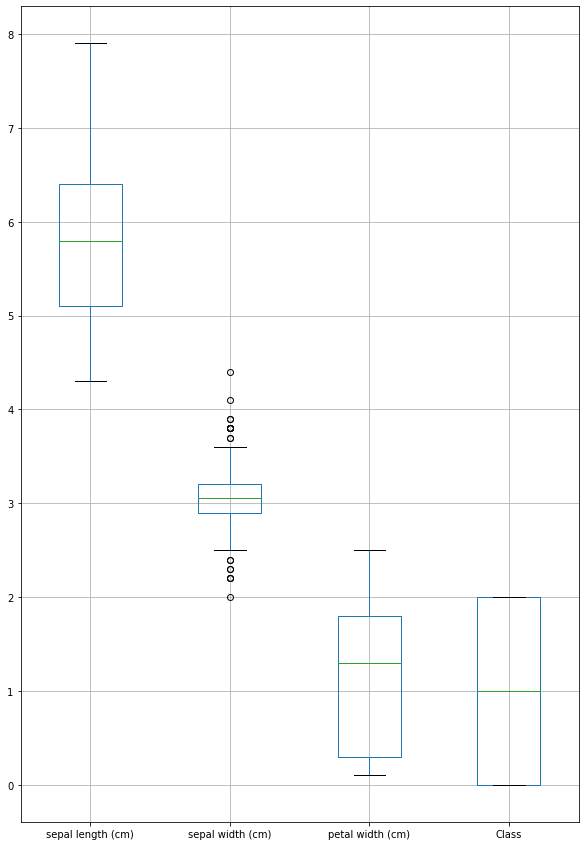

In [9]:
import matplotlib.pyplot as plt
df.boxplot(figsize=(10,15))
plt.show()

In [12]:
q1=df['sepal width (cm)'].quantile(.25)
q3=df['sepal width (cm)'].quantile(.75)
IQR=q3 - q1
df['sepal width (cm)']=np.clip(df['sepal width (cm)'], q1 - 1.5 * IQR, q3 + 1.5 * IQR)

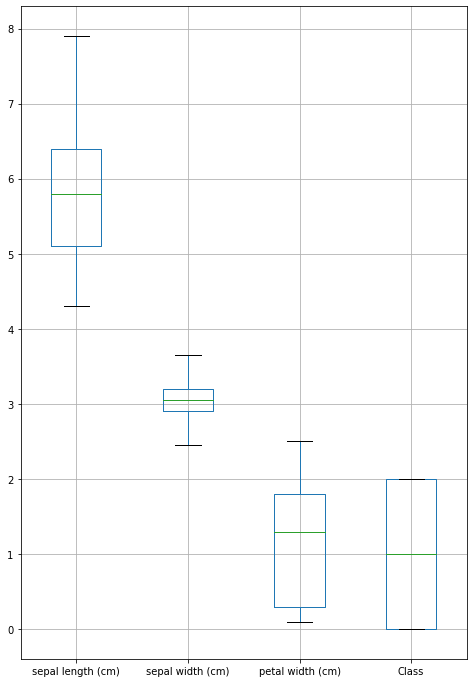

In [13]:
df.boxplot(figsize=(8,12))
plt.show()

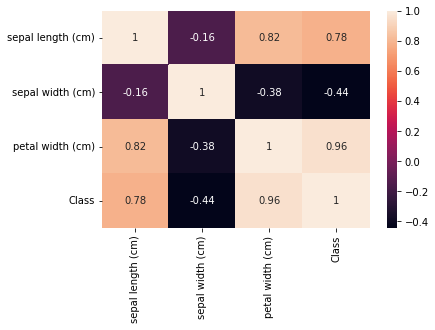

In [14]:
import seaborn as sns
correlation=df.corr()
sns.heatmap(correlation, annot=True)

In [15]:
df

,sepal length (cm),sepal width (cm),petal width (cm),Class
0,5.1,3.5000,0.2,0
1,4.9,3.0000,0.2,0
2,4.7,3.2000,0.2,0
3,4.6,3.1000,0.2,0
4,5.0,3.0575,0.2,0
...,...,...,...,...
145,6.7,3.0000,2.3,2
146,6.3,2.5000,1.9,2
147,6.5,3.0000,2.0,2
148,6.2,3.0575,2.3,2


In [16]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=7)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 3)
(30, 3)
(120,)
(30,)


In [17]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

models=[]
models.append(('lr', LogisticRegression()))
models.append(('decision tree', DecisionTreeClassifier()))
models.append(('svm', SVC(gamma='auto')))
models.append(('knn', KNeighborsClassifier()))
models.append(('naive bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))

for name, model in models:
  kfold=KFold(n_splits=10, random_state=7,shuffle=True)
  cross_val_sc=cross_val_score(model, X,Y, scoring='accuracy', cv=kfold)
  print('{} : acc: {}(standard deviation: {})'.format(name,cross_val_sc.mean(), cross_val_sc.std()))

lr : acc: 0.9533333333333334(standard deviation: 0.06699917080747259)
decision tree : acc: 0.9333333333333333(standard deviation: 0.06666666666666665)
svm : acc: 0.9666666666666666(standard deviation: 0.04472135954999579)
knn : acc: 0.9533333333333334(standard deviation: 0.04268749491621898)
naive bayes : acc: 0.9466666666666667(standard deviation: 0.08326663997864532)
Random Forest : acc: 0.9333333333333333(standard deviation: 0.06666666666666665)


In [20]:
model=LogisticRegression()
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[7 0 0]
 [0 9 3]
 [0 2 9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.82      0.75      0.78        12
           2       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.84      0.83      0.83        30

